In [31]:
import numpy as np
import pandas as pd
from pulp import *

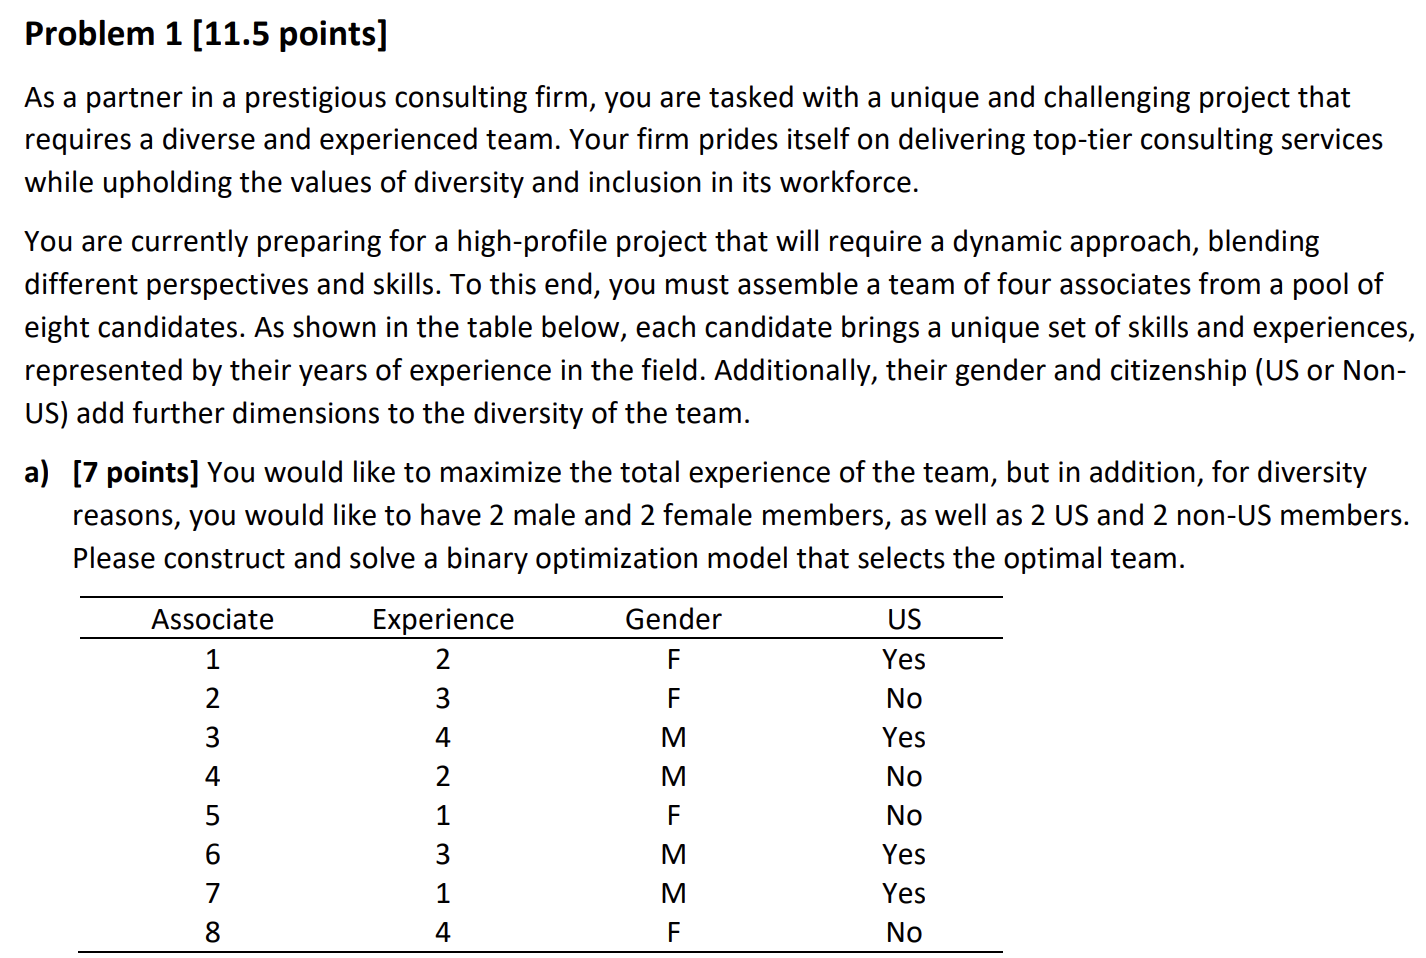

In [32]:
Consulting_LP = LpProblem("Consulting",LpMaximize)

In [33]:
Associate = [1,2,3,4,5,6,7,8]
Experience = {1:2, 2:3, 3:4, 4:2, 5:1, 6:3, 7:1, 8:4}
Gender = {1:"F", 2:"F", 3:"M", 4:"M", 5:"F", 6:"M", 7:"M", 8:"F"}
US = {1:"Y", 2:"N", 3:"Y", 4:"N", 5:"N", 6:"Y", 7:"Y", 8:"N"}

In [34]:
#Decision: Choose 4 associates
x = LpVariable.dicts("Associate", Associate, lowBound=0, cat='Binary')

In [35]:
#Object: Max Experience
Consulting_LP += lpSum( Experience[i]*x[i] for i in Associate )

In [36]:
#Constraint
#1. 2 male, 2 female
Consulting_LP += pulp.lpSum([x[i] for i in Associate if Gender[i] == 'M']) == 2
Consulting_LP += pulp.lpSum([x[i] for i in Associate if Gender[i] == 'F']) == 2
    
#2. 2 us, 2 non-us
Consulting_LP += pulp.lpSum([x[i] for i in Associate if US[i] == 'Y']) == 2
Consulting_LP += pulp.lpSum([x[i] for i in Associate if US[i] == 'N']) == 2

#3. 4 people
Consulting_LP += pulp.lpSum([x[i] for i in Associate]) == 4

In [37]:
Consulting_LP.solve()
print("Status:", LpStatus[Consulting_LP.status])
selected_associates = [i for i in Associate if x[i].value() == 1]
total_experience = sum(Experience[i] for i in selected_associates)
print("Selected Associates:", selected_associates)
print("Total Experience:", total_experience)

Status: Optimal
Selected Associates: [2, 3, 6, 8]
Total Experience: 14


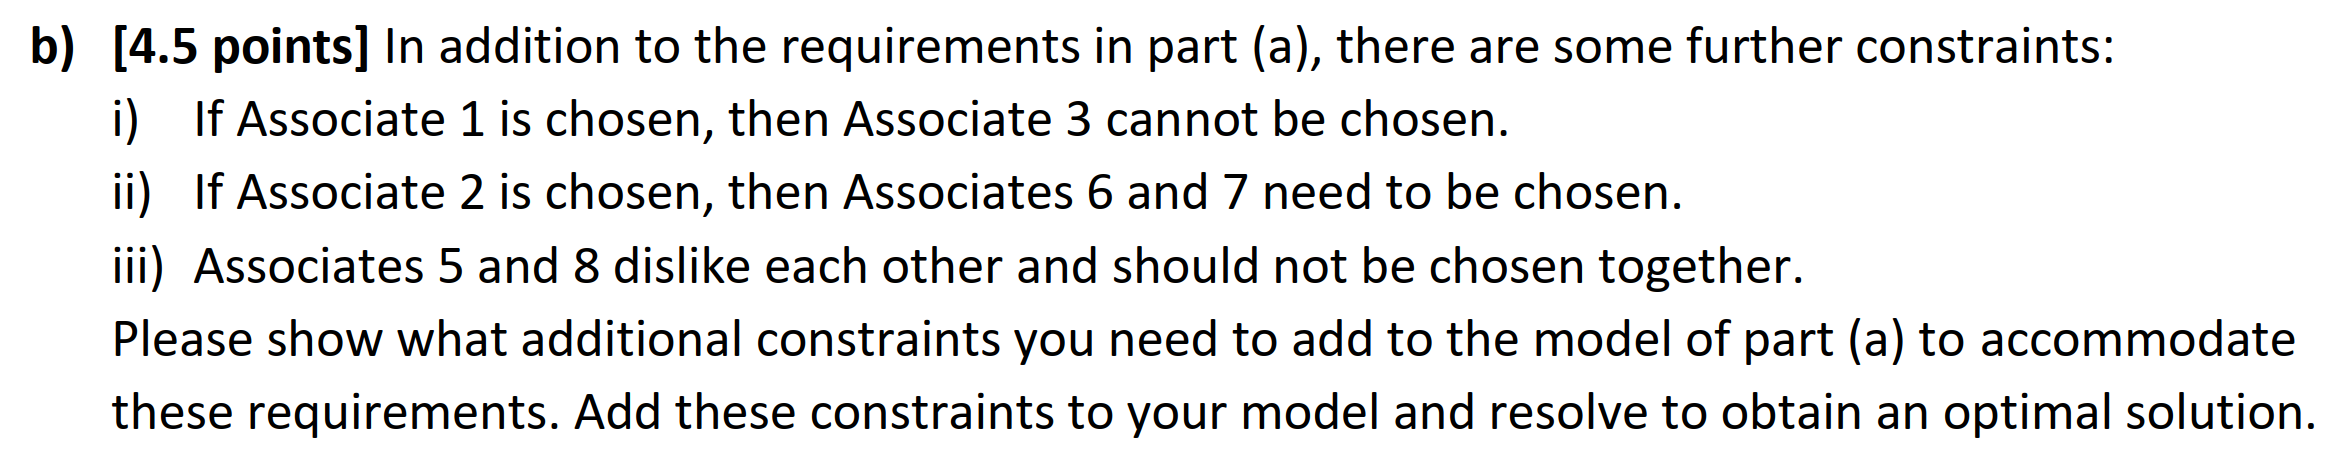

In [38]:
Consulting_LP2 = LpProblem("Consulting",LpMaximize)
Associate2 = [1,2,3,4,5,6,7,8]
Experience2 = {1:2, 2:3, 3:4, 4:2, 5:1, 6:3, 7:1, 8:4}
Gender2 = {1:"F", 2:"F", 3:"M", 4:"M", 5:"F", 6:"M", 7:"M", 8:"F"}
US2 = {1:"Y", 2:"N", 3:"Y", 4:"N", 5:"N", 6:"Y", 7:"Y", 8:"N"}
#Decision: Choose 4 associates
x2 = LpVariable.dicts("Associate", Associate2, lowBound=0, cat='Binary')
#Object: Max Experience
Consulting_LP2 += lpSum( Experience2[i]*x[i] for i in Associate2 )

In [39]:
#Constraint
#1. 2 male, 2 female
Consulting_LP2 += pulp.lpSum([x[i] for i in Associate2 if Gender2[i] == 'M']) == 2
Consulting_LP2 += pulp.lpSum([x[i] for i in Associate2 if Gender2[i] == 'F']) == 2
    
#2. 2 us, 2 non-us
Consulting_LP2 += pulp.lpSum([x[i] for i in Associate2 if US2[i] == 'Y']) == 2
Consulting_LP2 += pulp.lpSum([x[i] for i in Associate2 if US2[i] == 'N']) == 2

#3. 4 people
Consulting_LP2 += pulp.lpSum([x[i] for i in Associate2]) == 4

#New Constraints
#4. If Associate 1 is chosen, then Associate 3 cannot be chosen. 
Consulting_LP2 += x[1] + x[3] <= 1

#5. If Associate 2 is chosen, then Associates 6 and 7 need to be chosen. 
Consulting_LP2 += x[2] - x[6] <= 0
Consulting_LP2 += x[2] - x[7] <= 0
                               
#6. Associates 5 and 8 dislike each other and should not be chosen together.
Consulting_LP2 += x[5] + x[8] <= 1

In [40]:
Consulting_LP2.solve()
print("Status:", LpStatus[Consulting_LP2.status])
selected_associates2 = [i for i in Associate2 if x[i].value() == 1]
total_experience2 = sum(Experience2[i] for i in selected_associates2)
print("Selected Associates:", selected_associates2)
print("Total Experience:", total_experience2)

Status: Optimal
Selected Associates: [1, 4, 6, 8]
Total Experience: 11
